In [1]:
import matplotlib.pyplot as plt
import networkx as nx

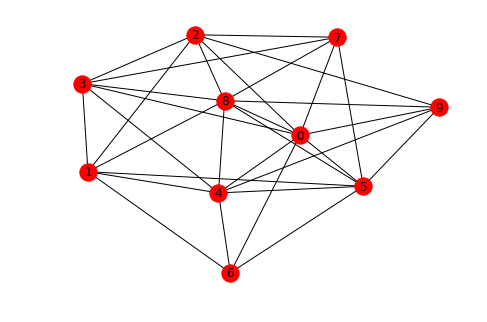

In [2]:
n = 10
p = 0.7
G = nx.gnp_random_graph(n, p, seed=93)
nx.draw(G, with_labels = True)
plt.show()

In [25]:
# Miary sieciowe

# stopień
print(nx.degree_centrality(G))
# bliskość
print(nx.closeness_centrality(G))
# pośrednictwo
print(nx.betweenness_centrality(G))
# pagerank
print(nx.pagerank(G))

{0: 0.8888888888888888, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.7777777777777777, 5: 0.7777777777777777, 6: 0.4444444444444444, 7: 0.5555555555555556, 8: 0.8888888888888888, 9: 0.5555555555555556}
{0: 0.9, 1: 0.75, 2: 0.75, 3: 0.75, 4: 0.8181818181818182, 5: 0.8181818181818182, 6: 0.6428571428571429, 7: 0.6923076923076923, 8: 0.9, 9: 0.6923076923076923}
{0: 0.09074074074074072, 1: 0.04675925925925925, 2: 0.0324074074074074, 3: 0.02407407407407407, 4: 0.04953703703703703, 5: 0.0625, 6: 0.004629629629629629, 7: 0.011111111111111112, 8: 0.056018518518518516, 9: 0.011111111111111112}
{0: 0.125682779619184, 1: 0.09759848704599473, 2: 0.09724825345266414, 3: 0.09681990982299056, 4: 0.1114909532903837, 5: 0.11179514185509688, 6: 0.06929345735751156, 7: 0.08268920456052786, 8: 0.12487064759070003, 9: 0.08251116540494646}


In [50]:
# Globalne miary sieciowe

# średnia z najkrótszych ścieżek
print(nx.average_shortest_path_length(G))
# średnica
print(nx.diameter(G))
# centralizacja stopni - Freeman centrality
degrees = [x[1] for x in G.degree]
max_delta = max([x[1] for x in G.degree])
freeman_centrality = sum([abs(x - max_delta) for x in degrees])/((len(degrees) - 1) * (len(degrees) - 2))
print(freeman_centrality)
# gęstość
print(nx.density(G))


1.3111111111111111
2
0.25
0.6888888888888889


In [33]:
from collections import OrderedDict

def compare(graph1, graph2):
    """
    Compare two graphs
    
    Args:
        graph1: First graph to compare
        graph2: Second graph to compare
    
    Returns:
        A dict with calculated diffrence measures
    """
    result = OrderedDict()
    # KS test for graph measurements distributions
    graph1_degree_centrality = list(nx.degree_centrality(graph1).values())
    graph2_degree_centrality = list(nx.degree_centrality(graph2).values())
    result['degree_centrality'] = stats.ks_2samp(graph1_degree_centrality, graph2_degree_centrality)
    
    graph1_closeness_centrality = list(nx.closeness_centrality(graph1).values())
    graph2_closeness_centrality = list(nx.closeness_centrality(graph2).values())
    result['closeness_centrality'] = stats.ks_2samp(graph1_closeness_centrality, graph2_closeness_centrality)
    
    graph1_betweenness_centrality = list(nx.betweenness_centrality(graph1).values())
    graph2_betweenness_centrality = list(nx.betweenness_centrality(graph2).values())
    result['betweenness_centrality'] = stats.ks_2samp(graph1_betweenness_centrality, graph2_betweenness_centrality)
    
    graph1_pagerank = list(nx.pagerank(graph1).values())
    graph2_pagerank = list(nx.pagerank(graph2).values())
    result['pagerank'] = stats.ks_2samp(graph1_pagerank, graph2_pagerank)
    
    # absolute value of global graph measurements subtraction
    result['average_shortest_path_length'] = abs(nx.average_shortest_path_length(graph1) - nx.average_shortest_path_length(graph2))
    result['diameter'] = abs(nx.diameter(graph1) - nx.diameter(graph2))
    result['degree_centrailty'] = '?'
    result['density'] = abs(nx.density(graph1) - nx.density(graph2))
    
    return result

In [34]:
from scipy import stats

n1, p1 = 10, 0.8
n2, p2 = 10, 0.5

graph1 = nx.gnp_random_graph(n1, p1, seed=93)
graph2 = nx.gnp_random_graph(n2, p2, seed=95)

compare(graph1, graph2)

OrderedDict([('degree_centrality',
              Ks_2sampResult(statistic=0.60000000000000009, pvalue=0.031046781145641307)),
             ('closeness_centrality',
              Ks_2sampResult(statistic=0.60000000000000009, pvalue=0.031046781145641307)),
             ('betweenness_centrality',
              Ks_2sampResult(statistic=0.30000000000000004, pvalue=0.67507815371659508)),
             ('pagerank',
              Ks_2sampResult(statistic=0.20000000000000007, pvalue=0.97478924654099508)),
             ('average_shortest_path_length', 0.24444444444444446),
             ('diameter', 0),
             ('degree_centrailty', '?'),
             ('density', 0.24444444444444446)])

In [9]:
"""
- weź wierzchołek
- policz mu cechy
    - stopień
    - pośrednictwo
    - bliskość
    - pagerank
    
- zrób z tego zbiór uczący
- zbuduj prostą dwuwarstwową sieć neuronową
- naucz sieć na zbiorze
- odpowiedź sieci + priority rank -> nowy graf
- porównaj wygenerowany graf z oryginalnym 
    - wynik porównania - funkcja kosztu sieci neuronowej
"""

'\n- weź wierzchołek\n- policz mu cechy\n    - stopień\n    - pośrednictwo\n    - bliskość\n    - pagerank\n    \n- zrób z tego zbiór uczący\n- zbuduj prostą dwuwarstwową sieć neuronową\n- naucz sieć na zbiorze\n- odpowiedź sieci + priority rank -> nowy graf\n- porównaj wygenerowany graf z oryginalnym \n    - wynik porównania - funkcja kosztu sieci neuronowej\n'

In [35]:
# attach attributes to the node
def attach_attributes(graph):
    degree_centralities = nx.degree_centrality(graph)
    betweenness_centralities = nx.betweenness_centrality(graph)
    closeness_centralities = nx.closeness_centrality(graph)
    pageranks = nx.pagerank(graph)

    for node_id in graph.nodes:
        node_attributes = {
            'degree_centrality': degree_centralities[node_id],
            'betweenness_centrality': betweenness_centralities[node_id],
            'closeness_centrality': closeness_centralities[node_id],
            'pagerank': pageranks[node_id]
        }
        graph.node[node_id].update(node_attributes)

In [37]:
attach_attributes(graph1)

In [38]:
graph1.nodes(data=True)

NodeDataView({0: {'closeness_centrality': 0.9, 'degree_centrality': 0.8888888888888888, 'pagerank': 0.11598102726055617, 'betweenness_centrality': 0.06507936507936508}, 1: {'closeness_centrality': 0.8181818181818182, 'degree_centrality': 0.7777777777777777, 'pagerank': 0.10294403977772097, 'betweenness_centrality': 0.03869047619047618}, 2: {'closeness_centrality': 0.8181818181818182, 'degree_centrality': 0.7777777777777777, 'pagerank': 0.1023552334751838, 'betweenness_centrality': 0.02804232804232804}, 3: {'closeness_centrality': 0.8181818181818182, 'degree_centrality': 0.7777777777777777, 'pagerank': 0.10209888011897106, 'betweenness_centrality': 0.020436507936507933}, 4: {'closeness_centrality': 0.9, 'degree_centrality': 0.8888888888888888, 'pagerank': 0.11549581103188503, 'betweenness_centrality': 0.042658730158730146}, 5: {'closeness_centrality': 0.9, 'degree_centrality': 0.8888888888888888, 'pagerank': 0.11604555765789243, 'betweenness_centrality': 0.06276455026455026}, 6: {'close

In [39]:
def get_attributes(node_attributes, prefix):
    attributes_dict = {
        prefix + key: value
        for key, value in node_attributes
    }
    return attributes_dict


def graph_to_training_set(graph):
    adj_matrix = nx.adjacency_matrix(graph)
    idxs = range(adj_matrix.shape[0])
    rows = []
    for node1_id in idxs:
        attrs1 = get_attributes(graph.node[node1_id].items(), 'node1_')
        for node2_id in idxs:
            attrs2 = get_attributes(graph.node[node2_id].items(), 'node2_')
            row = {
                #'node1': node1_id,
                #'node2': node2_id,
                'num_of_conn': adj_matrix[node1_id, node2_id]
            }
            row.update(attrs1)
            row.update(attrs2)
            rows.append(row)
    return rows

In [40]:
import pandas as pd

graph1_rows = graph_to_training_set(graph1)
df = pd.DataFrame(graph1_rows)
df

,node1_betweenness_centrality,node1_closeness_centrality,node1_degree_centrality,node1_pagerank,node2_betweenness_centrality,node2_closeness_centrality,node2_degree_centrality,node2_pagerank,num_of_conn
0,0.065079,0.900000,0.888889,0.115981,0.065079,0.900000,0.888889,0.115981,0
1,0.065079,0.900000,0.888889,0.115981,0.038690,0.818182,0.777778,0.102944,0
2,0.065079,0.900000,0.888889,0.115981,0.028042,0.818182,0.777778,0.102355,1
3,0.065079,0.900000,0.888889,0.115981,0.020437,0.818182,0.777778,0.102099,1
4,0.065079,0.900000,0.888889,0.115981,0.042659,0.900000,0.888889,0.115496,1
5,0.065079,0.900000,0.888889,0.115981,0.062765,0.900000,0.888889,0.116046,1
6,0.065079,0.900000,0.888889,0.115981,0.003968,0.642857,0.444444,0.064424,1
7,0.065079,0.900000,0.888889,0.115981,0.003968,0.692308,0.555556,0.076688,1
8,0.065079,0.900000,0.888889,0.115981,0.032011,0.900000,0.888889,0.114905,1
9,0.065079,0.900000,0.888889,0.115981,0.007937,0.750000,0.666667,0.089062,1


In [64]:
from keras.models import Sequential
from keras.layers import Dense

# TODO: 
# katz_centrality
# moga byc tez inne wlasnosci wierzcholka
model = Sequential()
# input - all node attributes -> output probability of connection
model.add(Dense(units=8, input_dim=8, activation='relu'))
model.add(Dense(units=1))

# TODO: loss - graph comparison
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
67/67 [==============================] - 0s 266us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 2/100
67/67 [==============================] - 0s 321us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 3/100
67/67 [==============================] - 0s 154us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 4/100
67/67 [==============================] - 0s 156us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 5/100
67/67 [==============================] - 0s 174us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 6/100
67/67 [==============================] - 0s 155us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 7/100
67/67 [==============================] - 0s 143us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 8/100
67/67 [==============================] - 0s 200us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 9/100
67/67 [==============================] - 0s 139us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 10/100
67/67 [==============================] - 0s 148us/step - loss: 10.8256 - acc: 

67/67 [==============================] - 0s 209us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 82/100
67/67 [==============================] - 0s 235us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 83/100
67/67 [==============================] - 0s 182us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 84/100
67/67 [==============================] - 0s 201us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 85/100
67/67 [==============================] - 0s 199us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 86/100
67/67 [==============================] - 0s 158us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 87/100
67/67 [==============================] - 0s 177us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 88/100
67/67 [==============================] - 0s 178us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 89/100
67/67 [==============================] - 0s 203us/step - loss: 10.8256 - acc: 0.0000e+00
Epoch 90/100
67/67 [==============================] - 0s 174us/step - loss: 10.8256 - acc: 0.00